In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
print('path',os.getcwd())

path C:\Users\mille\NYMC Presentation


In [3]:
# Import data set
cardio = pd.read_csv('C:/Users/mille/NYMC Presentation/Cardiovascular Disease.csv', sep = ';')

In [4]:
# View first few rows of data set
cardio.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


## Dataset Features
* id : Id of the row number
* age : Age of patient in days
* gender : Biological sex of the patient (1: Female, 2: Male)
* height : Height of the patient in centimeters
* weight : Weight of the patient in kilograms
* ap_hi : Systolic blood pressure. Pressure when blood is ejected in the arteries. Normal <= 120mmHg
* ap_lo : Diastolic blood pressure. Pressure when blood exerts between arteries and heartbeats. Normal <= 80mmHg
* cholesterol : Cholesterol value. 200mg/dL is ideal, 200/239 mg/dL borderline high for adults. For children 170 mg/dL is ideal with 170/199 mg/dL is borderline high
* gluc : Glucose level. Upon fasting for ~8hours < 100 mg/dL. Diabetics are around 70/80 mg/dL
* smoke : Binary value if a patient smokes or not (0: Non Smoker, 1: Smoker)
* alco : Binary value if a patient is an alcoholic (0: Not alcoholic, 1: Alcoholic)
* active : Binary value if a patient engages in physical activity(0: Not active, 1: Active)
* cardio : Target binary value if a patient has Cardiovascular disease (0: No CVD, 1: Has CVD)

## Data Cleaning & Wrangling

In [5]:
# Check for any missing values
cardio.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [6]:
# Drop the "id" column
cardio = cardio.drop('id', axis = 1)

In [7]:
# Review the first few rows again
cardio.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [8]:
# Find and remove outliers
def outliers(df_out, drop = False):
    for each_feature in df_out.columns:
        feature_data = df_out[each_feature]
        Q1 = np.percentile(feature_data, 25.) # 25th percentile of the data of the given feature
        Q3 = np.percentile(feature_data, 75.) # 75th percentile of the data of the given feature
        IQR = Q3-Q1 #Interquartile Range
        outlier_step = IQR * 1.5 #That's we were talking about above
        outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()  
        print('For the feature {}, No of Outliers is {}'.format(each_feature, len(outliers)))

outliers(cardio[['height', 'weight']])

For the feature height, No of Outliers is 519
For the feature weight, No of Outliers is 1819


In [9]:

cardio[['height', 'weight']] = np.log(cardio[['height', 'weight']])
outliers(cardio[['height', 'weight']])
cardio = cardio[(cardio['weight'] > cardio['weight'].quantile(0.005)) & (cardio['weight'] < cardio['weight'].quantile(0.995))]
cardio = cardio[(cardio['height'] > cardio['height'].quantile(0.005)) & (cardio['height'] < cardio['height'].quantile(0.995))]
outliers(cardio[['height', 'weight']])
cardio["height"] = np.expm1(cardio["height"])
cardio["weight"] = np.expm1(cardio["weight"])
cardio.shape

For the feature height, No of Outliers is 484
For the feature weight, No of Outliers is 1174
For the feature height, No of Outliers is 0
For the feature weight, No of Outliers is 349


(68370, 12)

In [10]:
# Calculate BMI for patients
cardio['bmi'] = np.round(cardio['weight']/(cardio['height']/100)**2,2)
print(cardio.shape)
cardio.head()

(68370, 13)


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,18393,2,167.0,61.0,110,80,1,1,0,0,1,0,21.87
1,20228,1,155.0,84.0,140,90,3,1,0,0,1,1,34.96
2,18857,1,164.0,63.0,130,70,3,1,0,0,0,1,23.42
3,17623,2,168.0,81.0,150,100,1,1,0,0,1,1,28.70
4,17474,1,155.0,55.0,100,60,1,1,0,0,0,0,22.89


In [11]:
# Convert age to years since it is currently in days
cardio['age'] = np.round(cardio.age/365,2)

# Convert height from centimeters to meters
cardio['height'] = cardio['height']/100

In [12]:
# Finding the categorical years
cardio.loc[(cardio.age <= 40), 'agecat'] = 1
cardio.loc[(cardio.age > 40)&(cardio.age <=45), 'agecat'] = 2
cardio.loc[(cardio.age > 40)&(cardio.age <=45), 'agecat'] = 3
cardio.loc[(cardio.age > 45)&(cardio.age <=50), 'agecat'] = 4
cardio.loc[(cardio.age > 50)&(cardio.age <=55), 'agecat'] = 5
cardio.loc[(cardio.age > 55)&(cardio.age <=60), 'agecat'] = 6
cardio.loc[(cardio.age > 60)&(cardio.age <=65), 'agecat'] = 7
cardio.loc[(cardio.age > 65)&(cardio.age <=70), 'agecat'] = 8
cardio.loc[(cardio.age >= 70), 'agecat'] = 9

An individuals BMI has the following guidelines:
* BMI <= 18.4 : underweight
* 18.5 <= BMI <= 24.9 : healty weight range
* 25 <= BMI <= 29.9 : overweight
* 30 <= BMI <= 39.9 : obese

In [13]:
# Categorize BMI from the above guidelines
cardio.loc[(cardio.bmi <=18.4),'bmi_category'] = 1
cardio.loc[(cardio.bmi >= 18.5) & (cardio.bmi <= 24.9), 'bmi_category'] = 2
cardio.loc[(cardio.bmi >= 25) & (cardio.bmi <=29.9), 'bmi_category'] = 3
cardio.loc[(cardio.bmi >=30) & (cardio.bmi <= 39.9),'bmi_category'] = 4
cardio.loc[(cardio.bmi >= 40), 'bmi_category'] = 5

In [14]:
# Categorize gender for ease of understanding
cardio.gender.replace(1,"Female",inplace = True)
cardio.gender.replace(2, "Male", inplace = True)

In [15]:
# Remove unlivable blood pressure 
out_filter = ((cardio["ap_hi"]>180) | (cardio["ap_lo"]>150))
cardio = cardio[~out_filter]
out_filter2 = ((cardio["ap_hi"] < 60) | (cardio["ap_lo"] < 30))
cardio = cardio[~out_filter2]

# Some cases diastolic pressure is higher than systolic, it is impossible with normal physiologic condition. 
cardio = cardio[~(cardio['ap_lo']> cardio['ap_hi'])]

## Exploratory Data Analysis

In [16]:
# Run descriptive statistics
cardio[['age','height','weight','ap_hi','ap_lo','cholesterol','bmi']].describe()

,age,height,weight,ap_hi,ap_lo,cholesterol,bmi
count,66826.000000,66826.000000,66826.000000,66826.000000,66826.000000,66826.000000,66826.000000
mean,53.323107,1.634782,72.909496,126.357795,81.196091,1.361775,27.321571
std,6.757342,0.074413,13.282409,15.971168,9.230181,0.677153,4.955664
min,29.580000,1.450000,44.800000,60.000000,30.000000,1.000000,14.470000
25%,48.380000,1.580000,64.000000,120.000000,80.000000,1.000000,23.800000
50%,53.970000,1.640000,71.000000,120.000000,80.000000,1.000000,26.260000
75%,58.410000,1.690000,81.000000,140.000000,90.000000,1.000000,30.090000
max,64.970000,1.840000,123.000000,180.000000,150.000000,3.000000,56.600000


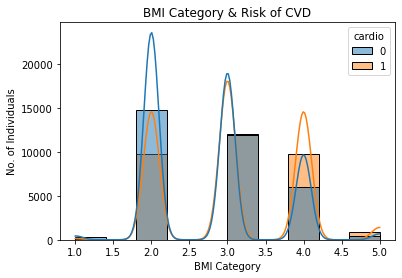

In [17]:
#Visualize relationship between BMI and presence of cardiovascular disease
ax = sns.histplot(x = 'bmi_category', data = cardio, hue = 'cardio', bins = 10, kde = True)
ax.set(xlabel = 'BMI Category', ylabel = 'No. of Individuals', title = 'BMI Category & Risk of CVD')
plt.show()

As shown by the histogram above as a patients BMI increases so does the risk of cardiovascular disease

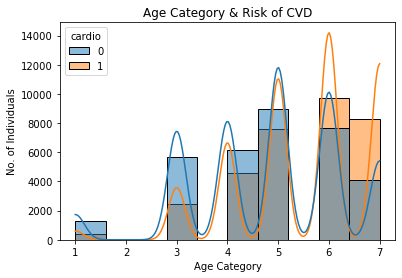

In [18]:
# Visualize relationship between age and presence of cardiovascular disease
ax = sns.histplot(x = 'agecat', data = cardio, hue = 'cardio', bins = 10, kde = True)
ax.set(xlabel = 'Age Category', ylabel = 'No. of Individuals', title = 'Age Category & Risk of CVD')
plt.show()

As an individual gets older their risk for cardiovascular disease seems to increase

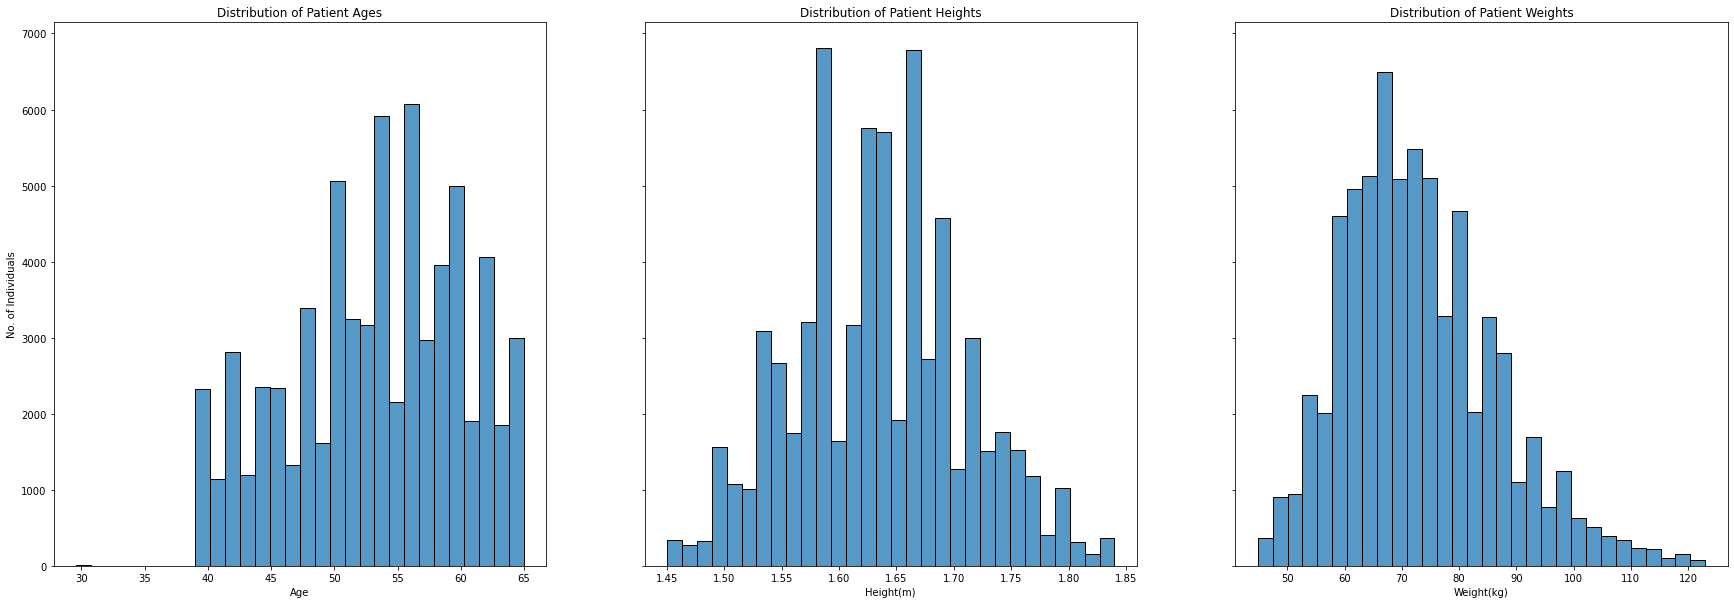

In [19]:
# Visualize distribution of ages, heights, and weights
fig, axs = plt.subplots(1,3, figsize = (30,10), sharex = False, sharey = True)
ax1 = sns.histplot(data = cardio, x = 'age', bins = 30, ax = axs[0])
ax1.set(xlabel = 'Age',ylabel = 'No. of Individuals', title = 'Distribution of Patient Ages')
ax2 = sns.histplot(data = cardio, x = 'height', bins = 30, ax = axs[1])
ax2.set(xlabel = 'Height(m)', ylabel = 'No. of Individuals', title = 'Distribution of Patient Heights')
ax3 = sns.histplot(data = cardio, x = 'weight', bins = 30, ax = axs[2])
ax3.set(xlabel = 'Weight(kg)', ylabel = 'No. of Individuals', title = 'Distribution of Patient Weights')
plt.show()

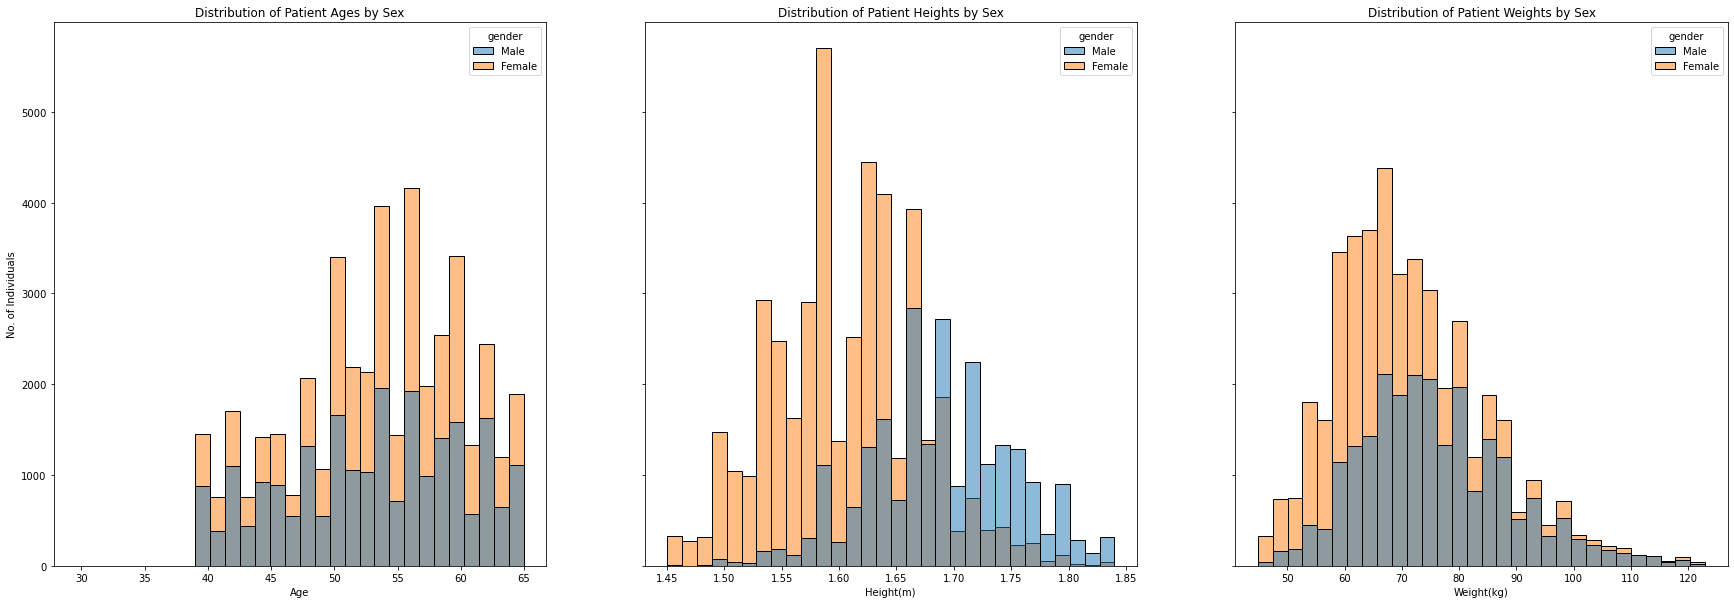

In [20]:
# Visualize distribution of ages, heights, and weights by sex
fig, axs = plt.subplots(1,3, figsize = (30,10), sharex = False, sharey = True)
ax1 = sns.histplot(data = cardio, x = 'age', hue= 'gender', bins = 30, ax = axs[0])
ax1.set(xlabel = 'Age',ylabel = 'No. of Individuals', title = 'Distribution of Patient Ages by Sex')
ax2 = sns.histplot(data = cardio, x = 'height', hue = 'gender', bins = 30, ax = axs[1])
ax2.set(xlabel = 'Height(m)', ylabel = 'No. of Individuals', title = 'Distribution of Patient Heights by Sex')
ax3 = sns.histplot(data = cardio, x = 'weight', hue = 'gender',bins = 30, ax = axs[2])
ax3.set(xlabel = 'Weight(kg)', ylabel = 'No. of Individuals', title = 'Distribution of Patient Weights by Sex')
plt.show()

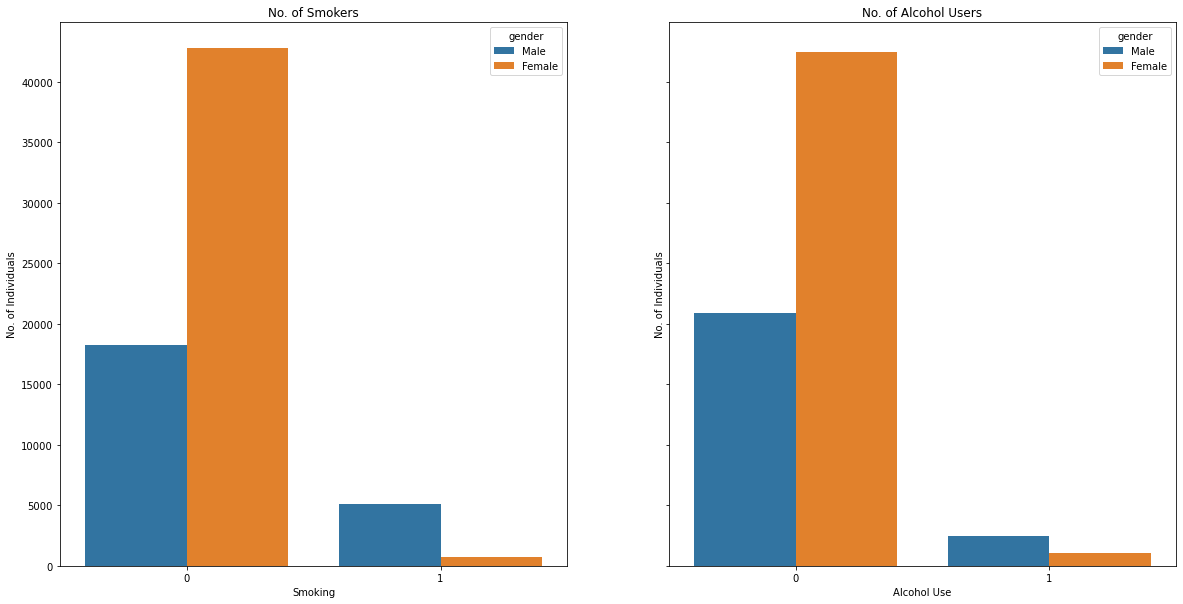

In [21]:
# Visualize the relationship between sex and smoking and alcohol use
fig, axs = plt.subplots(1,2, figsize = (20,10), sharex = False, sharey = True)
ax1 = sns.countplot(data = cardio, x = 'smoke', hue = 'gender', ax = axs[0])
ax1.set(xlabel = 'Smoking', ylabel = 'No. of Individuals', title = 'No. of Smokers')
ax2 = sns.countplot(data = cardio, x = 'alco', hue = 'gender', ax = axs[1])
ax2.set(xlabel = 'Alcohol Use', ylabel = 'No. of Individuals', title = 'No. of Alcohol Users')
plt.show()

It appears as though men smoke and drink more than women

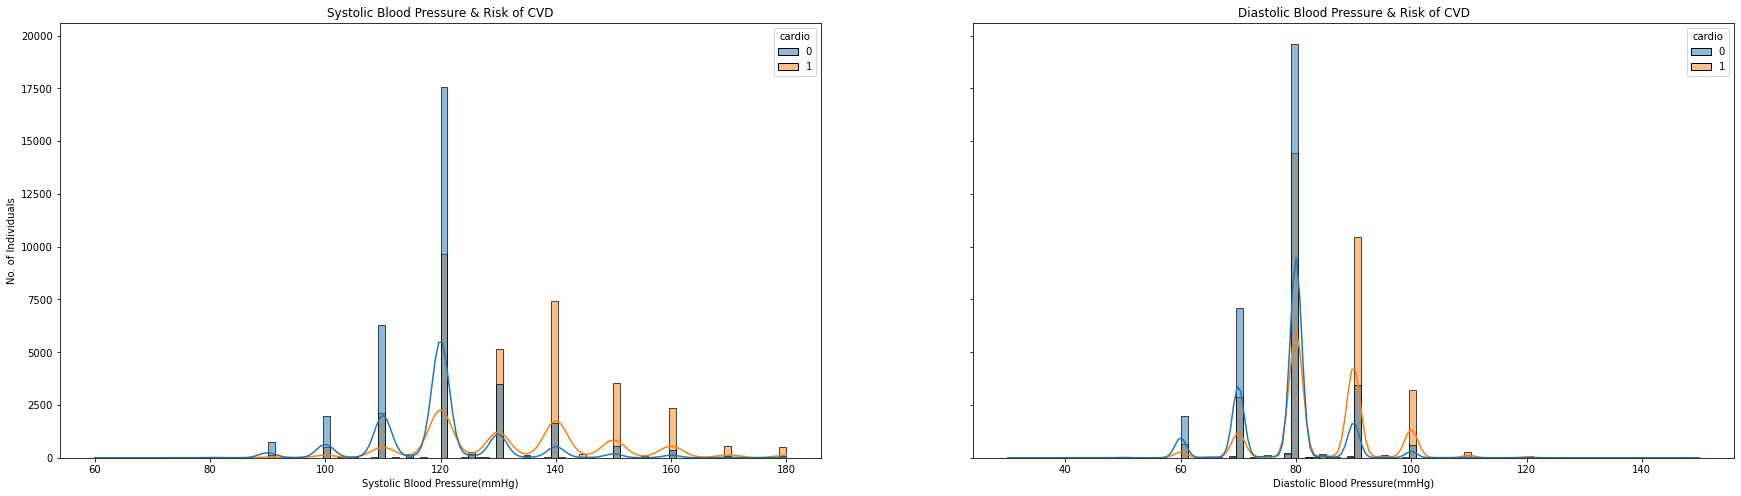

In [22]:
# Visualize the relationship between blood pressure and cardio
fig, axs = plt.subplots(1,2, figsize = (30,8), sharex = False, sharey = True)
ax1 = sns.histplot(data = cardio, x = 'ap_hi', hue = 'cardio', kde = True, bins = 100, ax = axs[0])
ax1.set(xlabel = 'Systolic Blood Pressure(mmHg)', ylabel = 'No. of Individuals', title = 'Systolic Blood Pressure & Risk of CVD')
ax2 = sns.histplot(data = cardio, x = 'ap_lo', hue= 'cardio', kde = True, bins = 100, ax = axs[1])
ax2.set(xlabel = 'Diastolic Blood Pressure(mmHg)', ylabel = 'No. of Individuals', title = 'Diastolic Blood Pressure & Risk of CVD')
plt.show()

It appears that as an individuals Systolic and Diastolic blood pressure increases so does their risk for cardiovascular disease

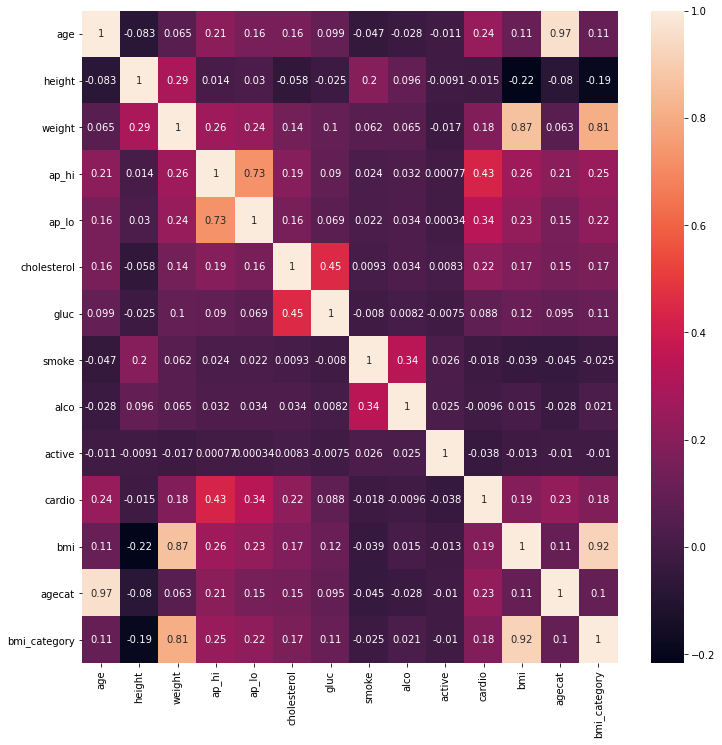

In [23]:
# Heat map to determine correlation of features
corr = cardio.corr()

fig = plt.subplots(figsize = (12,12))
ax = sns.heatmap(data = corr, annot = True)
plt.show()

In [24]:
# Create a copy for Dashboard building
cardio.to_csv('cardio edited.csv')

It appears that the features with the highest correlation to cardiovascular disease are age, systolic blood pressure, diastolic blood pressure, cholesterol, bmi, and weight

## Model Building & Prediction

### Data Preprocessing

In [25]:
# Import necessary machine learning libraries
from sklearn import neighbors
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn import preprocessing

In [26]:
# Recode gender
le = preprocessing.LabelEncoder()
cardio.gender = le.fit_transform(cardio.gender)
cardio.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,agecat,bmi_category
0,50.39,1,1.67,61.0,110,80,1,1,0,0,1,0,21.87,5.0,2.0
1,55.42,0,1.55,84.0,140,90,3,1,0,0,1,1,34.96,6.0,4.0
2,51.66,0,1.64,63.0,130,70,3,1,0,0,0,1,23.42,5.0,2.0
3,48.28,1,1.68,81.0,150,100,1,1,0,0,1,1,28.70,4.0,3.0
4,47.87,0,1.55,55.0,100,60,1,1,0,0,0,0,22.89,4.0,2.0


In [27]:
# Drop dependent features
cardio.drop(columns =['age','height','weight','ap_hi','ap_lo','bmi'],inplace = True)
cardio.head()

,gender,cholesterol,gluc,smoke,alco,active,cardio,agecat,bmi_category
0,1,1,1,0,0,1,0,5.0,2.0
1,0,3,1,0,0,1,1,6.0,4.0
2,0,3,1,0,0,0,1,5.0,2.0
3,1,1,1,0,0,1,1,4.0,3.0
4,0,1,1,0,0,0,0,4.0,2.0


In [28]:
# Get dummy variables
cardio = pd.get_dummies(cardio, columns = ['gender','cholesterol','gluc','smoke','alco','active','bmi_category','agecat'],drop_first = True)
cardio.head()

,cardio,gender_1,cholesterol_2,cholesterol_3,gluc_2,gluc_3,smoke_1,alco_1,active_1,bmi_category_2.0,bmi_category_3.0,bmi_category_4.0,bmi_category_5.0,agecat_3.0,agecat_4.0,agecat_5.0,agecat_6.0,agecat_7.0
0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0
1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0
2,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,1,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0


In [29]:
X = cardio.copy()
y = X.cardio
X.drop(columns = 'cardio', inplace = True)
X.shape, y.shape

((66826, 17), (66826,))

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

### Random Forest Classifier

In [31]:
# Create variable for Random Forest Classifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

# Create variable for predictors
rfc_pre = rfc.predict(X_test)

# Create data frame with actual values and predicted values
predictions = pd.DataFrame(index = y_test.index)
predictions['actual'] = y_test

# Add rfc_pre to data frame
predictions['rfc'] = rfc_pre

# Create variable for accuracy
acc_rfc = round(rfc.score(X_train, y_train)*100, 2)

# Create variable for test accuracy
acc_test_rfc = round(rfc.score(X_test, y_test)*100, 2)

In [32]:
# View the classification report
print(classification_report(y_test, rfc_pre))

              precision    recall  f1-score   support

           0       0.62      0.69      0.65      6806
           1       0.64      0.56      0.60      6560

    accuracy                           0.63     13366
   macro avg       0.63      0.63      0.62     13366
weighted avg       0.63      0.63      0.63     13366



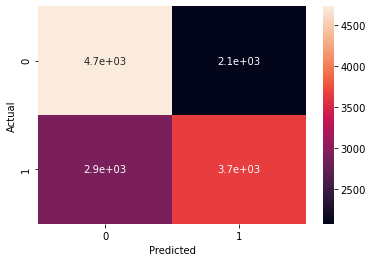

In [33]:
# Visualize confusion matrix for the Random Forest Classifier
cm = pd.DataFrame(confusion_matrix(y_test, rfc_pre))
ax = sns.heatmap(cm, annot = True)
ax.set(xlabel = 'Predicted', ylabel = 'Actual')
plt.show()

### Decision Tree Classifier

In [34]:
# Create classifier and fit the data
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# Create variable for the predictors
dtc_pre = dtc.predict(X_test)

# Add predictors to data frame
predictions['dtc'] = dtc_pre

# Create variable for accuracy
acc_dtc = round(dtc.score(X_train, y_train)*100, 2)

# Create variable for test accuracy
acc_test_dtc = round(dtc.score(X_test, y_test)*100, 2)

# View the classification report
print(classification_report(y_test, dtc_pre))

              precision    recall  f1-score   support

           0       0.62      0.70      0.66      6806
           1       0.64      0.55      0.59      6560

    accuracy                           0.63     13366
   macro avg       0.63      0.63      0.62     13366
weighted avg       0.63      0.63      0.62     13366



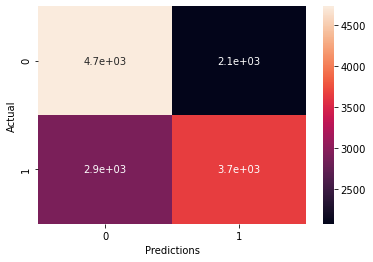

In [35]:
# Visualize the confusion matrix for the Decision Tree Classifier
cmd = pd.DataFrame(confusion_matrix(y_test, dtc_pre))
ax = sns.heatmap(cm, annot = True)
ax.set(xlabel = 'Predictions', ylabel = 'Actual')
plt.show()

### Logistic Regression

In [36]:
# Create regression and fit the data
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Create variable for predictors
log_pre = logreg.predict(X_test)

# Add predictors to data frame
predictions['log_reg'] = log_pre

# Create variable for accuracy
acc_log = round(logreg.score(X_train, y_train)* 100, 2)

# Create variable for test accuracy
acc_test_log = round(logreg.score(X_test, y_test)*100, 2)

# View the classification report
print(classification_report(y_test, log_pre))

              precision    recall  f1-score   support

           0       0.63      0.69      0.66      6806
           1       0.64      0.58      0.61      6560

    accuracy                           0.64     13366
   macro avg       0.64      0.63      0.63     13366
weighted avg       0.64      0.64      0.63     13366



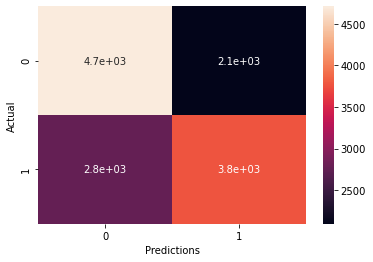

In [37]:
# View the confusion matrix for the logistic regression
cml = confusion_matrix(y_test, log_pre)
ax = sns.heatmap(cml, annot = True)
ax.set(xlabel = 'Predictions', ylabel = 'Actual')
plt.show()

### Ridge Classifier

In [38]:
# Create and fit the data to the ridge regression
ridge = RidgeClassifier()
ridge.fit(X_train, y_train)

# Create variable for predictors
ridge_pre = ridge.predict(X_test)

# Add predictions to data frame
predictions['Ridge'] = ridge_pre

# Create variable for accuracy
acc_ridge = round(ridge.score(X_train, y_train)*100, 2)

# Create variable for test accuracy
acc_test_ridge = round(ridge.score(X_test, y_test)*100, 2)

# View the classification report
print(classification_report(y_test, ridge_pre))

              precision    recall  f1-score   support

           0       0.63      0.69      0.66      6806
           1       0.64      0.58      0.61      6560

    accuracy                           0.64     13366
   macro avg       0.64      0.63      0.63     13366
weighted avg       0.64      0.64      0.63     13366



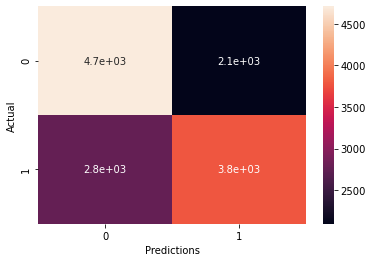

In [39]:
# View the confusion matrix for the ridge classifier
cmr = confusion_matrix(y_test, ridge_pre)
ax = sns.heatmap(cmr, annot = True)
ax.set(xlabel = 'Predictions', ylabel = 'Actual')
plt.show()

In [40]:
# Create a data frame for the models and accuracies
models  = pd.DataFrame({'Model':['Random Forest', 'Decision Tree', 'Logistic Regression', 'Ridge Classifier'],
                       'Score Train': [acc_rfc, acc_dtc, acc_log, acc_ridge],
                      'Score Test':[acc_test_rfc, acc_test_dtc, acc_test_log, acc_test_ridge]})



In [41]:
# View the models accuracy for test and train data frame
models.sort_values(by = ['Score Train', 'Score Test'], ascending = True)

,Model,Score Train,Score Test
3,Ridge Classifier,63.92,63.56
2,Logistic Regression,63.94,63.54
1,Decision Tree,65.36,62.64
0,Random Forest,65.36,62.73


In [42]:
# Get the percentage difference between the accuracy scores of the train and test sets
models['Percent Difference'] = abs(models['Score Train'] - models['Score Test'])

# View the new data set
models.sort_values(by = ['Score Train', 'Score Test'], ascending = True)

,Model,Score Train,Score Test,Percent Difference
3,Ridge Classifier,63.92,63.56,0.36
2,Logistic Regression,63.94,63.54,0.40
1,Decision Tree,65.36,62.64,2.72
0,Random Forest,65.36,62.73,2.63


## Model Conclusions
Based on the few classifying algorithms I created, we can see that the Ridge Classifier and the Logistic Regression had the best accuracy of 64.71% and 64.69% respectively of classifying an individual with cardiovascular disease. The Logistic Regression had the smallest percent difference of 103% between the training model and the testing model, however, the accuracy of the Ridge Classifier was only 64.71% The accuracy of all these models is subject to change depending on the test size. For this experiment I chose a train/test split of 80/20. Of course there is always more ways to classify cardiovascular disease among individuals. Neural Networks and Gradient Boosting Classifiers can alter our findings.